### LDA Topic Modeling using Gensim package
### Import the dataframe


In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 150)

df = pd.read_csv("/home/gtrane/ClassData/group03/html_project.csv", sep = '\t')
df

,file_name,article_title,article_author,company_author,date,body_text
0,Panama Reports Country's First Monkeypox Case.html,Panama Reports Country's First Monkeypox Case,Elida Moreno,Reuters Health Information,"July 06, 2022",PANAMA CITY (Reuters) - Panama registered its first case of monkeypox in a resident who was infected after being in contact with tourists from Eur...
1,How Doctors Can Manage Their Daily Work Stress.html,How Doctors Can Manage Their Daily Work Stress,Rachel Reiff Ellis,Medscape Medical News,"March 23, 2023","As a physician, you may ruminate over an interaction with a patient or worry about a complicated procedure that didn't go as expected. You work th..."
2,Climate Change Projected to Fuel Rise in Suicide Deaths.html,Climate Change Projected to Fuel Rise in Suicide Deaths,Megan Brooks,Medscape Medical News,"March 29, 2023","The warming of the planet may mean more suicides, new research suggests. New findings show a significant association between higher temperatures a..."
3,A Moral Compass Is Apparent Even in Infants.html,A Moral Compass Is Apparent Even in Infants,Medscape Staff,Quick Take,"June 13, 2022","Even babies as young as 8 months old can recognize bad behavior and punish it, according to researchers at Osaka University in Japan. What to kno..."
4,Ohio Measles Outbreak Sickens Nearly 60 Children.html,Ohio Measles Outbreak Sickens Nearly 60 Children,Lisa O'Mary,WebMD Health News,"December 07, 2022",Measles has sickened 59 children in an outbreak that began in November and now spans four Ohio counties. None of the children had been fully vacci...
...,...,...,...,...,...,...
8760,EMPA-Kidney Moves the Needle for SGLT2 Inhibitors in Kidney Disease.html,EMPA-Kidney Moves the Needle for SGLT2 Inhibitors in Kidney Disease,"Mitchel L. Zoler, PhD",Medscape Medical News,"November 04, 2022","Dr William Herrington ORLANDO, Florida — The sodium-glucose cotransporter 2 (SGLT2) inhibitor empagliflozin (Jardiance) significantly slowed prog..."
8761,Paxlovid Reduces Risk of COVID Death by 79% in Older Adults.html,Paxlovid Reduces Risk of COVID Death by 79% in Older Adults: Study,Carolyn Crist,WebMD Health News,"August 26, 2022",Editor's note: Find the latest COVID-19 news and guidance in Medscape's Coronavirus Resource Center. The antiviral drug Paxlovid appears to reduc...
8762,"'Stunning Variation' in CV Test, Procedure Cost at US Hospitals.html","'Stunning Variation' in CV Test, Procedure Costs Revealed at Top US Hospitals",Marilynn Larkin,Medscape Medical News,"July 22, 2022","Wide variation in the cost of common cardiovascular (CV) tests and procedures, from stress tests to coronary interventions, was revealed in a cros..."
8763,Patients With Schizophrenia Twice as Likely to Develop Dementia?.html,Patients With Schizophrenia Twice as Likely to Develop Dementia?,"Batya Swift Yasgur, MA, LSW",Medscape Medical News,"October 24, 2022",Patients with psychotic disorders such as schizophrenia are more than twice as likely as those without a psychotic disorder to eventually develop ...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8765 entries, 0 to 8764
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   file_name       8765 non-null   object
 1   article_title   8765 non-null   object
 2   article_author  8581 non-null   object
 3   company_author  8757 non-null   object
 4   date            8763 non-null   object
 5   body_text       8763 non-null   object
dtypes: object(6)
memory usage: 411.0+ KB


### Import libraries

In [2]:
import nltk; #nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.9/site-packages/matplotlib/__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/home/gtrane/.local/lib/python3.9/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/usr/local/lib/python3.9/site-packages/matplotlib/__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/home/gtrane/.local/lib/python3.9/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/usr/local/lib/python3.9/site-packages/matplotlib/__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if L

### Tokenize body text

In [3]:
df.body_text = df.body_text.astype(str)
dataNC = df.body_text
dataNC = dataNC.values.tolist()
#print(dataNC[:1])

data_outNC = []
for text in dataNC:
     data_outNC.append([w for w in nltk.word_tokenize(text)])
#print(data_outNC[:1])

Build bigram and trigram

In [4]:
# Build the bigram
bigram = gensim.models.Phrases(data_outNC, min_count=5, threshold=100) # higher threshold fewer phrases
bigram_mod = gensim.models.phrases.Phraser(bigram)

Stopwords, make bigrams

In [5]:
# NLTK Stop words
stop_words = stopwords.words('english')
stop_words.extend(['say','source', 'bit', 'ly', 'pdas', 'bit','may','also','go','reuters','medscape','said','says','would','like']) #cleaned text stopwords

In [6]:
# Define functions for stopwords, bigrams
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

Call the functions

In [7]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_outNC)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

Create dictionary and corpus

In [8]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
#print(corpus[:2])

In [11]:
#Corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('according', 1),
  ('adding', 1),
  ('afternoon', 1),
  ('around', 1),
  ('asymptomatic', 1),
  ('authorities', 1),
  ('body', 1),
  ('case', 3),
  ('cases', 2),
  ('choy', 1),
  ('city', 1),
  ('completely', 1),
  ('confirmed', 2),
  ('contact', 1),
  ('controlled', 1),
  ('countries', 1),
  ('country', 1),
  ('director', 1),
  ('disease', 1),
  ('editing', 1),
  ('eli', 1),
  ('endemic', 1),
  ('europe', 1),
  ('exceeded', 1),
  ('facility', 1),
  ('first', 2),
  ('found', 1),
  ('gorgas', 1),
  ('health', 2),
  ('home', 1),
  ('infected', 2),
  ('infection', 1),
  ('isolating', 1),
  ('juan', 1),
  ('kylie', 1),
  ('laboratory', 1),
  ('later', 1),
  ('least', 1),
  ('lesions', 1),
  ('less', 1),
  ('lethal', 1),
  ('luis', 1),
  ('madry', 1),
  ('marguerita', 1),
  ('medical', 1),
  ('memorial', 1),
  ('minister', 1),
  ('ministry', 1),
  ('monkeypox', 6),
  ('moreno', 1),
  ('nationality', 1),
  ('notified', 1),
  ('outbreaks', 1),
  ('panama', 3),
  ('pascale', 1),
  ('patient

The following function was created to iterate through different numbers of topics in order to find the topic with the highest coherence value, which is a metric for evaluating the quality of topics generated by an LDA model and can be used to guide model selection and parameter tuning.

Coherence value can be used to evaluate the quality of topics generated by an LDA model. A higher coherence value means the words in the topic are more semantically related, which can suggest that the topic is more meaningful and interpretable.

Thus, we chose 22 topics since it produced the highest coherence.

In [15]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model  = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        
        coherencemodel = CoherenceModel(model = model, texts = texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [1]:
# Call function. Starting at 2 topics, up to 24, stepping by 2.
# model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=26, step=2)

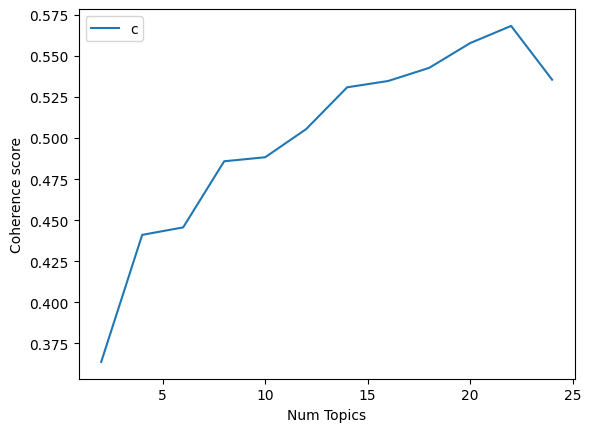

In [18]:
# Visualize coherence values
limit=26; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
#Choosing the optimal number of LDA topics: 22

### Build topic model with 22 topics

In [9]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=22, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

View topics

In [20]:
# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(10,
  '0.087*"brain" + 0.071*"dementia" + 0.059*"ms" + 0.043*"ad" + '
  '0.040*"neurology" + 0.039*"cognitive" + 0.032*"alzheimer" + 0.022*"disease" '
  '+ 0.020*"cognitive_impairment" + 0.019*"cognition"'),
 (14,
  '0.078*"depression" + 0.059*"mental" + 0.037*"anxiety" + 0.036*"psychiatry" '
  '+ 0.031*"disorder" + 0.027*"suicide" + 0.026*"health" + 0.021*"concussion" '
  '+ 0.018*"psychiatric" + 0.018*"stress"'),
 (1,
  '0.061*"china" + 0.043*"covid" + 0.019*"beijing" + 0.016*"chinese" + '
  '0.016*"shanghai" + 0.015*"city" + 0.012*"government" + 0.010*"restrictions" '
  '+ 0.010*"reporting" + 0.010*"day"'),
 (0,
  '0.057*"surgery" + 0.044*"study" + 0.037*"patients" + 0.028*"surgical" + '
  '0.021*"summary" + 0.019*"prostate_cancer" + 0.019*"key" + '
  '0.019*"peer_reviewed" + 0.017*"preprint" + 0.015*"yet"'),
 (4,
  '0.190*"children" + 0.040*"parents" + 0.036*"young" + 0.035*"pediatric" + '
  '0.030*"child" + 0.029*"age" + 0.026*"years" + 0.020*"adolescents" + '
  '0.017*"pediatri

### Visualize

In [10]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/home/gtrane/.local/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
21     0.181449 -0.122841       1        1  16.248504
11     0.189291  0.039249       2        1  14.561185
19     0.172718 -0.126260       3        1  12.638476
7      0.132040  0.071981       4        1   9.587124
8      0.140843 -0.047849       5        1   6.444996
9      0.117947  0.176576       6        1   6.005851
15     0.140786 -0.104205       7        1   4.611919
13     0.089228  0.206431       8        1   4.291984
5      0.051827 -0.168513       9        1   3.678056
12     0.066022  0.135838      10        1   3.568738
17     0.064803 -0.167057      11        1   2.931142
3      0.013861 -0.155292      12        1   2.441011
6      0.024438  0.106384      13        1   2.413943
16    -0.063071  0.176334      14        1   1.984329
18    -0.064663  0.148011      15        1   1.462111
1     -0.049768  0.224904      16        1   1.421720
2     -0.159764 -0.099874      17        1   1.372849
0     -0.046702 -0.185285      18        1   1.229657
4     -0.198593  0.007792      19        1   1.120239
14    -0.227030 -0.058024      20        1   0.874872
10    -0.268649 -0.072425      21        1   0.631248
20    -0.307015  0.014124      22        1   0.480045, topic_info=               Term          Freq         Total Category  logprob  loglift
320        patients  48760.000000  48760.000000  Default  30.0000  30.0000
689           study  31886.000000  31886.000000  Default  29.0000  29.0000
152           covid  18331.000000  18331.000000  Default  28.0000  28.0000
1921         cancer  10785.000000  10785.000000  Default  27.0000  27.0000
28           health  26373.000000  26373.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
2881           lost    193.383606    796.609755  Topic22  -4.5248   3.9234
5814         pounds    103.842861    136.512543  Topic22  -5.1466   5.0655
7180        nordisk    117.925087    275.094185  Topic22  -5.0195   4.4920
7210         weekly    125.793075    562.136154  Topic22  -4.9549   3.8419
5622  concentration    114.948834    315.033299  Topic22  -5.0450   4.3309

[1409 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
7360      3  0.115713  abnormal
7360     17  0.828506  abnormal
7360     21  0.050914  abnormal
7888      2  0.999726  abortion
781       2  0.085274   academy
...     ...       ...       ...
486      18  0.080700   youtube
1330      3  0.108378      zero
1330      5  0.009853      zero
1330     11  0.007882      zero
1330     16  0.872938      zero

[3531 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[22, 12, 20, 8, 9, 10, 16, 14, 6, 13, 18, 4, 7, 17, 19, 2, 3, 1, 5, 15, 11, 21])

#### Aside from a few overlapping circles, most of the topics have clearly defined boundaries and are similarly sized

Topics identified:

- 1 General topic about studies, findings, for adult population; analysis and research
- 2 Abortion news: clinics, women, pregnancy, centers, case
- 3 Studies and research: clinical trials, placebo, results, study group, treatments & efficacy, significance, data
- 4 Most general, not much insight
- 5 About patient care: healthcare access, physician training, education, providers, primary care
- 6 About monkeypox outbreak
- 7 Recommendations, guidelines, detection, diagnosis, screening and testing of HIV
- 8 Finances associated with healthcare costs; insurance, medicaid, coverage, money, financial system
- 9 Genetics of diseases: blood, glucose, levels, genetics, diseases, cell, gene research, effects
- 10 FDA: drugs, approved products, reporting, agency
- 11 Cardiovascular topics: heart, cardiology, stroke, blood pressure, heart failure
- 12 Cancer: patients, chemotherapy, oncology, treatment, tumor, survivor, overall survival, months free, progression, mutations
- 13 COVID: long term infections, pandemic, variants, latest news and guidance, Paxlovid medication
- 14 Federal state law, Supreme Court, bills, lawsuits, rulings
- 15 Covid vaccines: vaccination, protections dose, second shot, booster, Pfizer, Moderna
- 16 China covid news: Hong Kong, Shanghai, Beijing, reported infections, zero tolerance policy, travel, restrictions, measures, government
- 17 Symptoms of pain: chronic, condition, problems, duration, migraine, allergy, insomnia
- 18 Surgery: patients, prostate cancer, procedures fracture, postoperative
- 19 Pediatrics: infants, childhood, family, birth, maternal
- 20 Mental illness: depression, anxiety, suicide, mental health, mood, emotional, cognitive, psychology
- 21 Brain health: dementia, Alzheimers, cognitive impairment, MRI, neurology, NFL
- 22 Obesity: weight, cmi, bariatric surgery, lifestyle, body mass